# Data statistics

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

label_color = 'black'
new_bar_color = 'blue'
old_bar_color = 'orange'
tick_color = 'black'
title_color = 'black'

In [2]:
dataset_name = 'postprocessed_dataset.csv'
columns_list = ['Name', 'Code', 'Category']

try:
    df = pd.read_csv(dataset_name)
except Exception: 
    df = pd.DataFrame(columns = columns_list)
    
assert (df.columns == columns_list).all()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      3371 non-null   object
 1   Code      3371 non-null   object
 2   Category  3371 non-null   object
dtypes: object(3)
memory usage: 79.1+ KB


In [3]:
old_dataset_name = 'parser_dataset.csv'

try:
    old_df = pd.read_csv(old_dataset_name)
except Exception: 
    old_df = pd.DataFrame(columns = columns_list)
    
assert (old_df.columns == columns_list).all()

old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2903 entries, 0 to 2902
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2903 non-null   object
 1   Code      2903 non-null   object
 2   Category  2903 non-null   object
dtypes: object(3)
memory usage: 68.2+ KB


## Snippets length

In [4]:
old_code_len = old_df['Code'].apply(len)
new_code_len = df['Code'].apply(len)
print('-'*10 + 'Original' + '-'*10)
print(f"Minimal code snippet length: {old_code_len.min()}")
print(f"Maximal code snippet length: {old_code_len.max()}")
print(f"Average code snippet length: {old_code_len.mean()}")
print(f"Standart deviation of code snippet length: {old_code_len.std()}")
print()
print('-'*10 + 'Postprocessed' + '-'*10)
print(f"Minimal code snippet length: {new_code_len.min()}")
print(f"Maximal code snippet length: {new_code_len.max()}")
print(f"Average code snippet length: {new_code_len.mean()}")
print(f"Standart deviation of code snippet length: {new_code_len.std()}")

----------Original----------
Minimal code snippet length: 68
Maximal code snippet length: 30085
Average code snippet length: 1369.3021012745435
Standart deviation of code snippet length: 2037.8086835851293

----------Postprocessed----------
Minimal code snippet length: 49
Maximal code snippet length: 15489
Average code snippet length: 614.7244141204391
Standart deviation of code snippet length: 924.4479502675765


1204


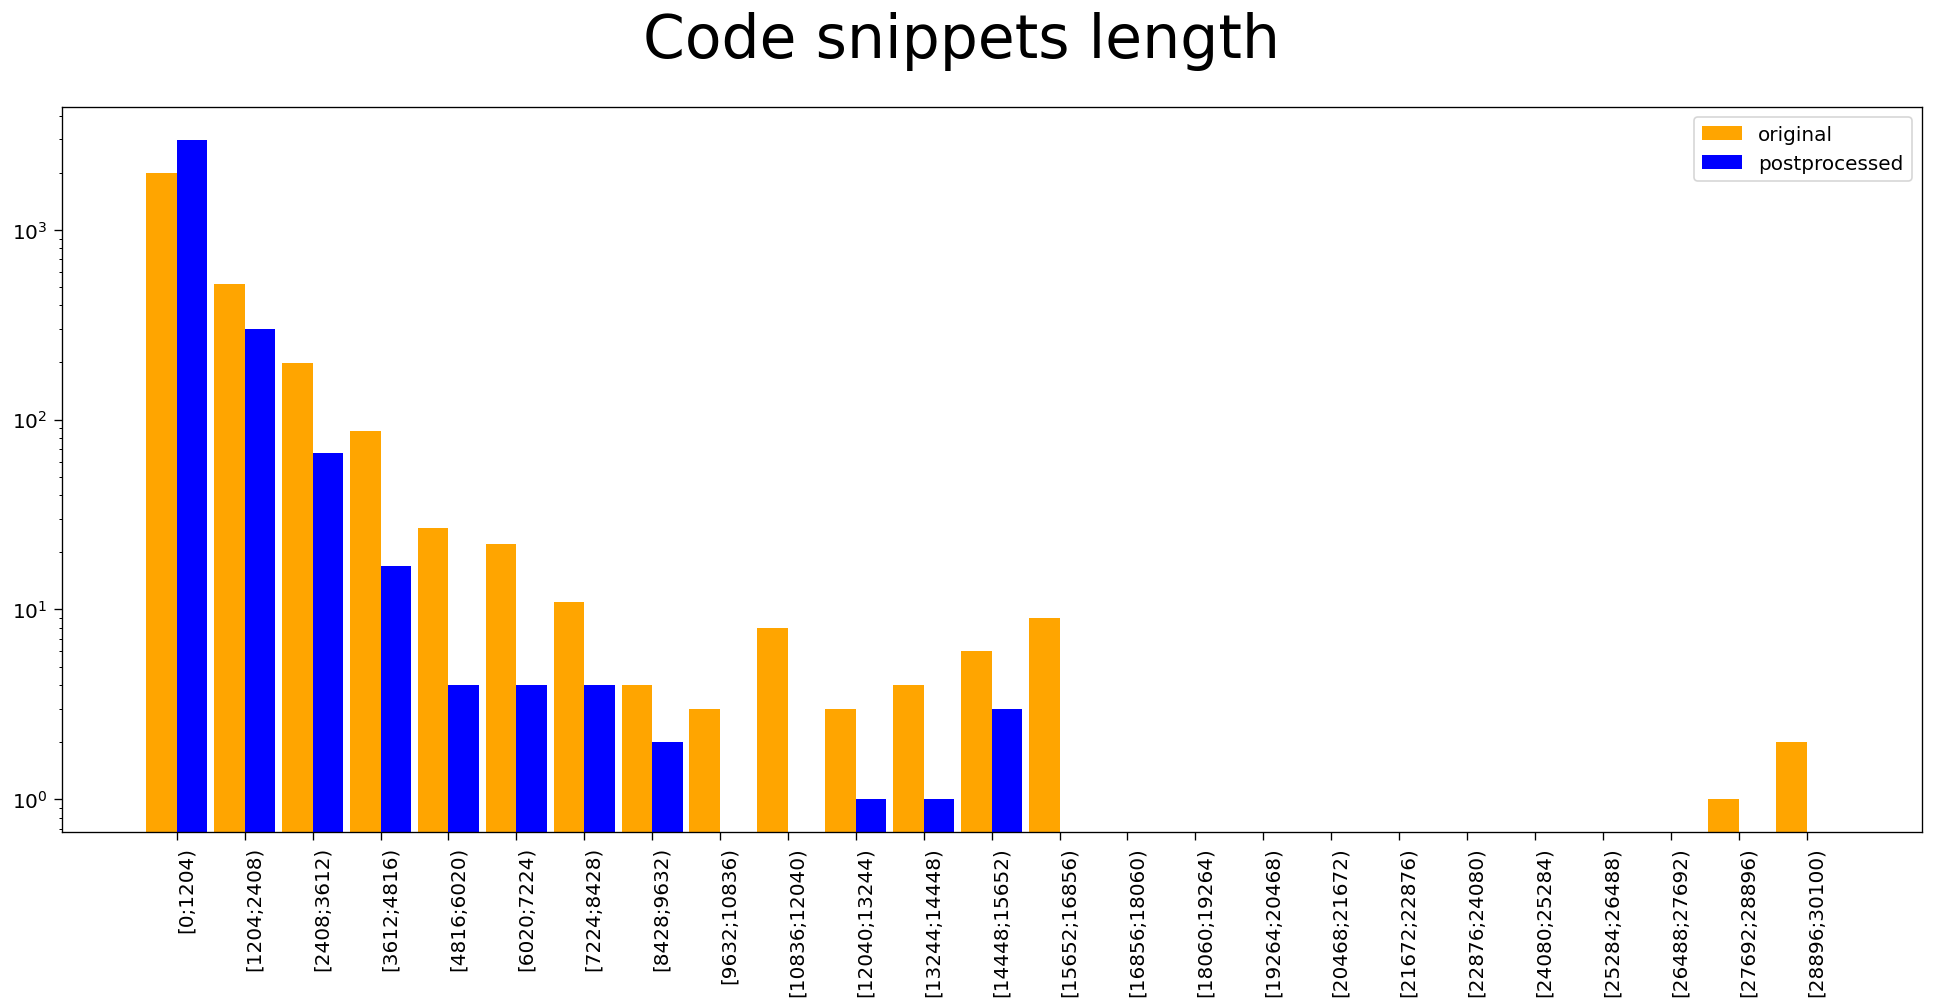

In [5]:
##### from ipywidgets import interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

def plot_graph(hm_columns):
    width = max(old_code_len.max(), new_code_len.max()) // hm_columns + 1
    print(width)
    old_y = np.zeros(hm_columns)
    new_y = np.zeros(hm_columns)

    for size in old_code_len:
        old_y[size // width] += 1
    
    for size in new_code_len:
        new_y[size // width] += 1
    
    x = np.arange(0, hm_columns)
    
    labels = []
    for i in np.arange(0, max(old_code_len.max(), new_code_len.max()), width):
        labels.append(f"[{i};{i + width})")
    
    fig, ax = plt.subplots(1, 1, figsize = (hm_columns * 0.8, 8), dpi = 120)
    
    fig.suptitle("Code snippets length", color = title_color, size = 36)
    
    bar_width = 0.45
    
    ax.tick_params(labelcolor = label_color, labelsize = 12, color = tick_color, size = 5);
    old_bar = ax.bar(x - bar_width / 2, old_y, color = old_bar_color, width = bar_width, align = 'center', label = 'original', log = True)
    new_bar = ax.bar(x + bar_width / 2, new_y, color = new_bar_color, width = bar_width, align = 'center',label = 'postprocessed', log = True)
    
    ax.set_xticks(x, labels, color = tick_color)
    
    ax.legend(fontsize = 12)

    
    plt.setp(ax.get_xticklabels(), rotation = 90, ha = "right", rotation_mode = "anchor")
    
    
plot_graph(25)

plt.savefig("snip_len.png")

# Words analysis

In [6]:
import re

words_count = dict()
no_vars_words_count = dict()

for (_, row) in df.iterrows():
    code = row[1]
    for word in re.split('\W', code):
        if not word.isalpha():
            continue
        if word == '':
            continue
        if word in words_count:
            words_count[word] += 1
        else:
            words_count[word] = 1
        if row['Name'] != word:
            if word in no_vars_words_count:
                no_vars_words_count[word] += 1
            else:
                no_vars_words_count[word] = 1

In [7]:
import re

old_words_count = dict()
old_no_vars_words_count = dict()

for (_, row) in old_df.iterrows():
#     print(row)
    code = row[1]
    for word in re.split('\W', code):
        if not word.isalpha():
            continue
        if word == '':
            continue
        if word in old_words_count:
            old_words_count[word] += 1
        else:
            old_words_count[word] = 1
        if row['Name'] != word:
            if word in old_no_vars_words_count:
                old_no_vars_words_count[word] += 1
            else:
                old_no_vars_words_count[word] = 1
        

In [8]:
hm_words_show = 20

stats = pd.Series(words_count).sort_values(ascending = False)[:hm_words_show][::-1]
no_vars_stats = pd.Series(no_vars_words_count).sort_values(ascending = False)[:hm_words_show][::-1]

old_stats = pd.Series(old_words_count).sort_values(ascending = False)[:hm_words_show][::-1]
old_no_vars_stats = pd.Series(old_no_vars_words_count).sort_values(ascending = False)[:hm_words_show][::-1]

In [9]:
a = pd.Series(words_count)
a['while']

429

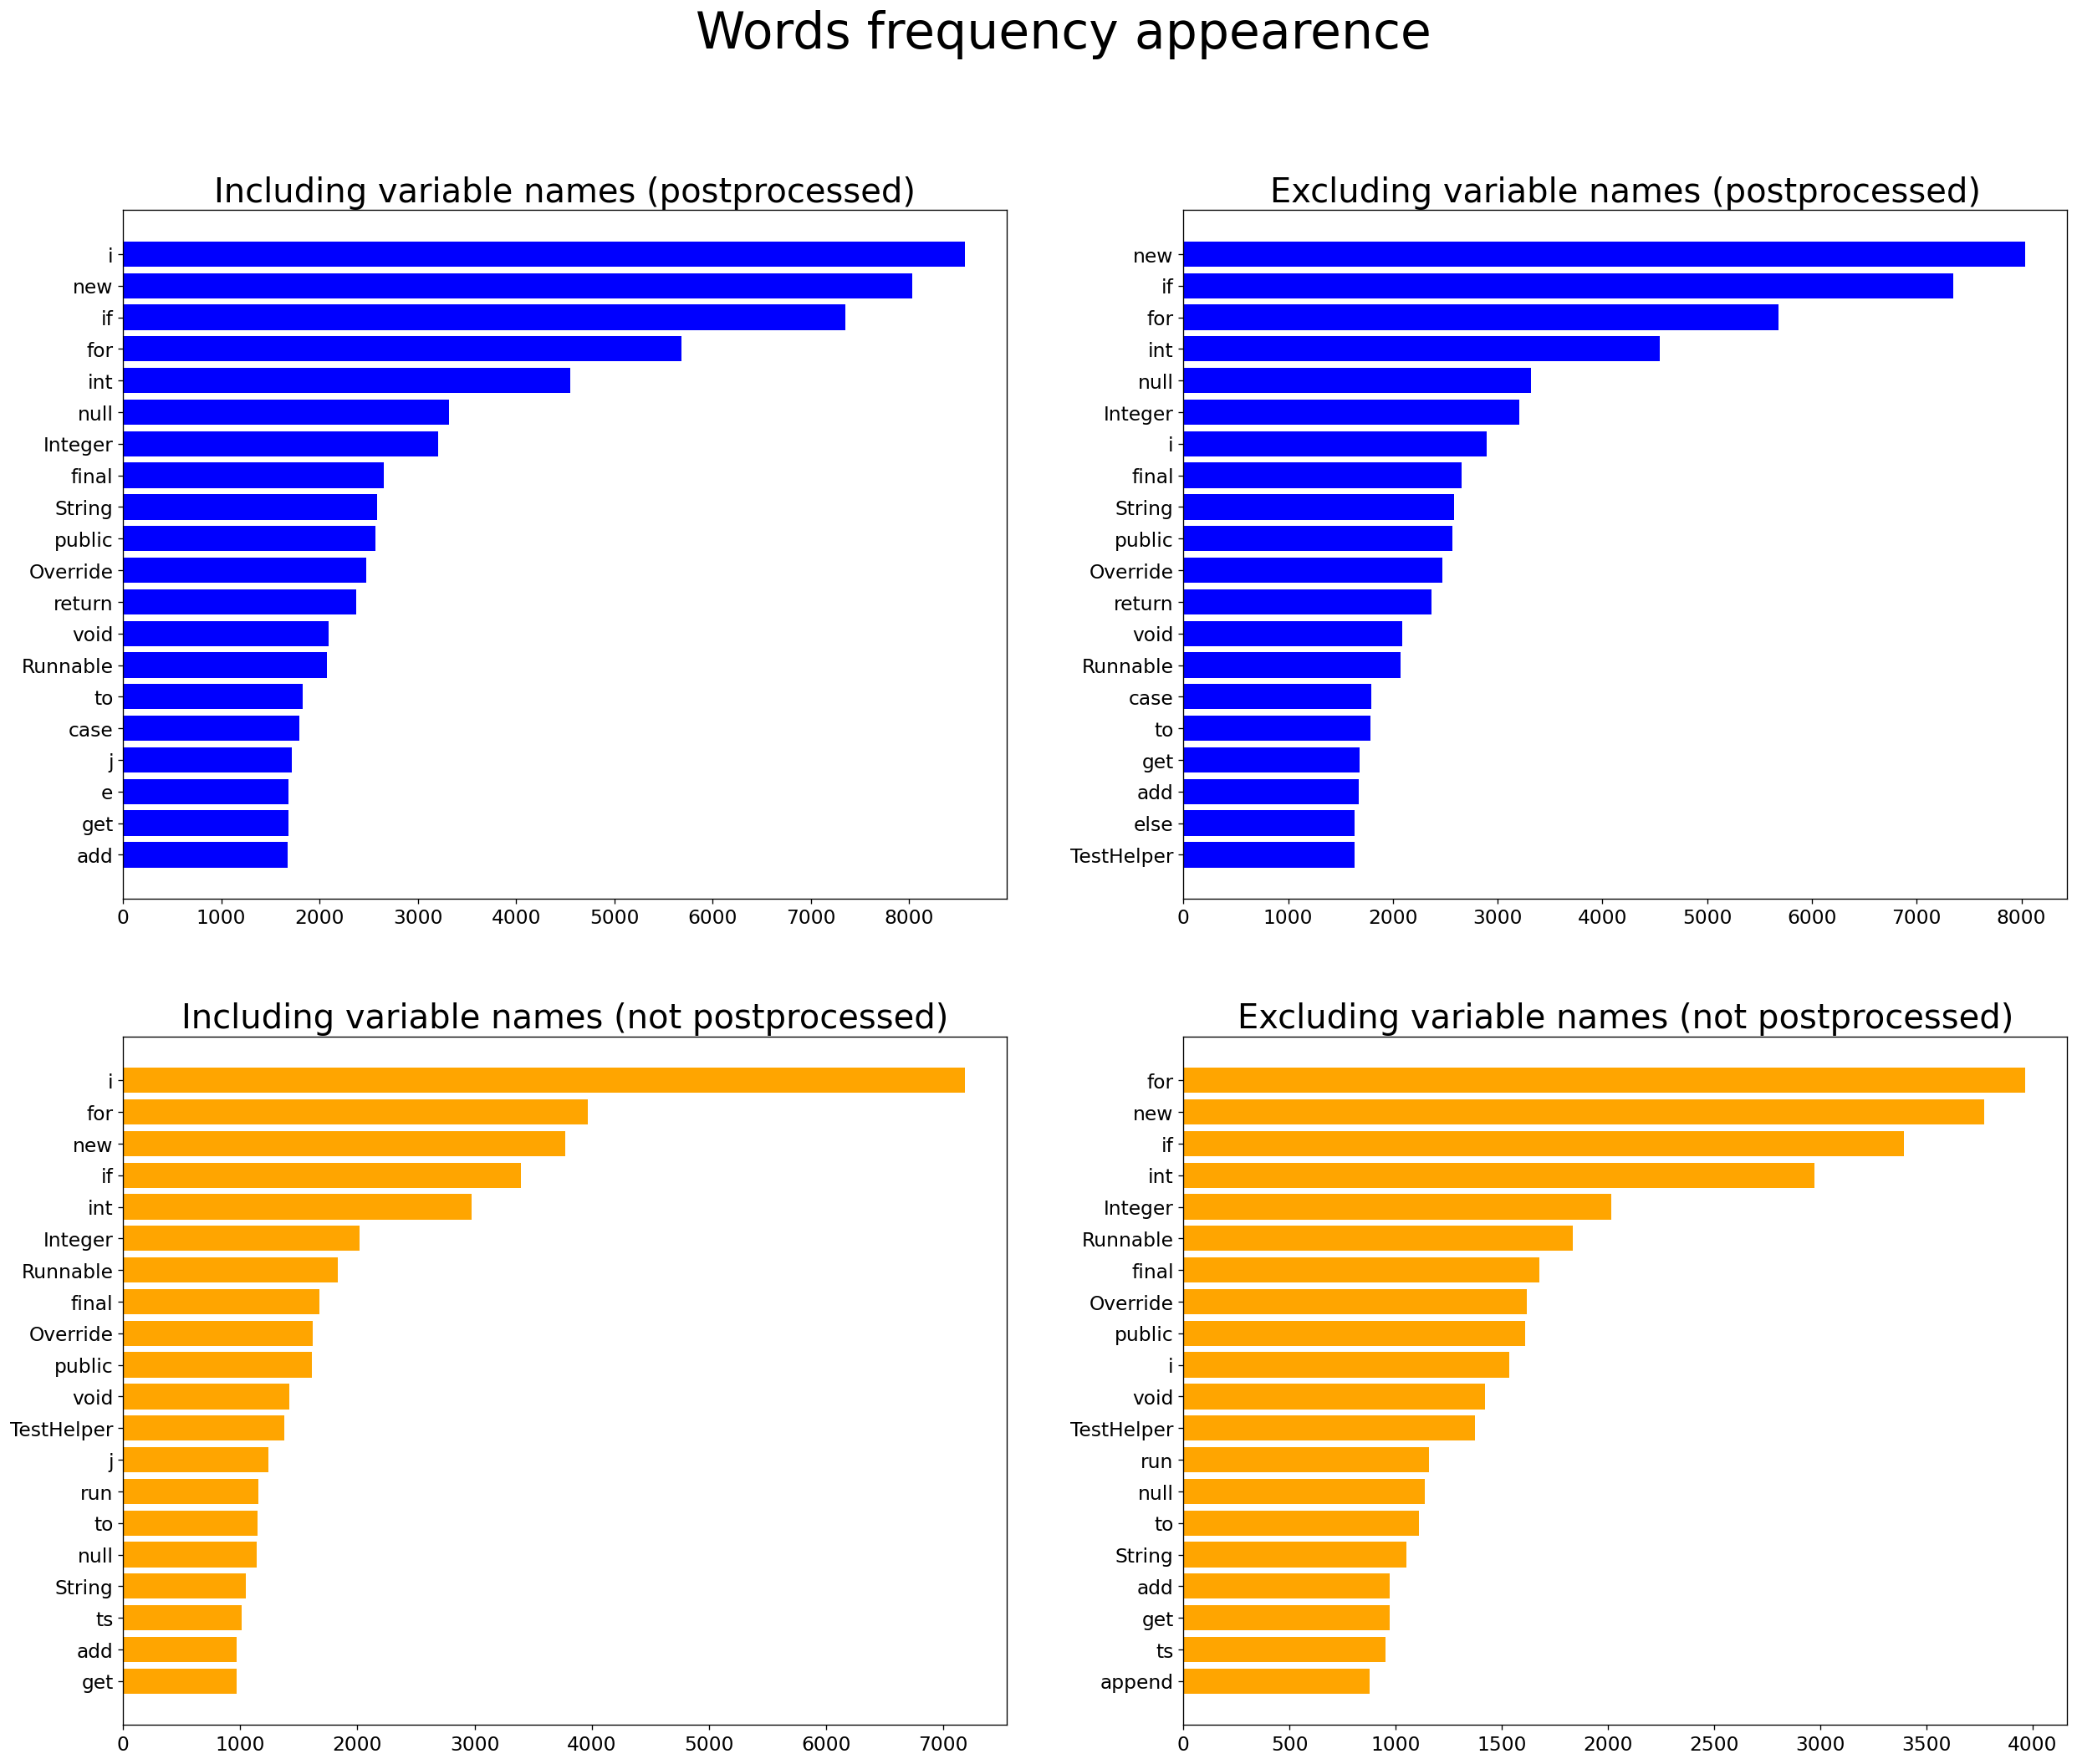

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (25, hm_words_show), dpi = 120)

title_fontdict = {
    'fontsize': 24,
    'color': title_color,
    'horizontalalignment': 'center'
}

fig.suptitle("Words frequency appearence", size = 36, color = title_color)

ax[1,0].tick_params(labelcolor = label_color, labelsize = 14);
ax[1,0].barh(stats.keys(), stats.values, linewidth = 0.9, color = old_bar_color)
ax[1, 0].set_title('Including variable names (not postprocessed)', fontdict = title_fontdict)

ax[1,1].tick_params(labelcolor = label_color, labelsize = 14);
ax[1,1].barh(no_vars_stats.keys(), no_vars_stats.values, linewidth = 0.9, color = old_bar_color)
ax[1,1].set_title('Excluding variable names (not postprocessed)', fontdict = title_fontdict)

ax[0,0].tick_params(labelcolor = label_color, labelsize = 14);
ax[0,0].barh(old_stats.keys(), old_stats.values, linewidth = 0.9, color = new_bar_color)
ax[0,0].set_title('Including variable names (postprocessed)', fontdict = title_fontdict)

ax[0,1].tick_params(labelcolor = label_color, labelsize = 14);
ax[0,1].barh(old_no_vars_stats.keys(), old_no_vars_stats.values, linewidth = 0.9, color = new_bar_color)
ax[0,1].set_title('Excluding variable names (postprocessed)', fontdict = title_fontdict)


plt.savefig("name_freq.png")

# How often variable name appears in snippet

In [11]:
def count_var(x):
    name = x['Name']
    code = x['Code']
    
    idx = 0
    name_len = len(name)
    count = 0
    
    while idx != len(code) - 1:
        if idx < len(code) - 1 and code[idx:idx+2] == r'/*':
            idx = code.find(r'*/', idx)
        if idx < len(code) - 1 and code[idx:idx+2] == r'//':
            idx = code.find('\n', idx)
        if code[idx] == r'"':
            idx = code.find(r'"', idx + 1);
        if idx == -1:
            break
        
        prevIdx = idx - 1
        postIdx = idx + name_len

        if code[idx : postIdx] == name and (prevIdx == -1 or not code[prevIdx].isalnum()) and (postIdx >= len(code) or not code[postIdx].isalnum()):
            count += 1
            
        idx += 1
            
    return count

In [12]:
hm_var_appeared = df.apply(count_var, axis = 1).value_counts()
hm_var_appeared.keys()

Int64Index([ 3,  4,  2,  5,  6,  7,  1,  8,  9, 10, 11, 13, 14, 19, 20, 15, 12,
            24, 16, 17, 61, 56, 44, 32, 25, 50, 23, 29, 18, 30, 21, 49],
           dtype='int64')

In [13]:
n = df.shape[0]
mean = np.multiply(hm_var_appeared.values/n, hm_var_appeared.keys().to_numpy()).sum()
# print(mean)
print(f"Average amount of target variable appearance: {mean}")

Average amount of target variable appearance: 4.030258083654702


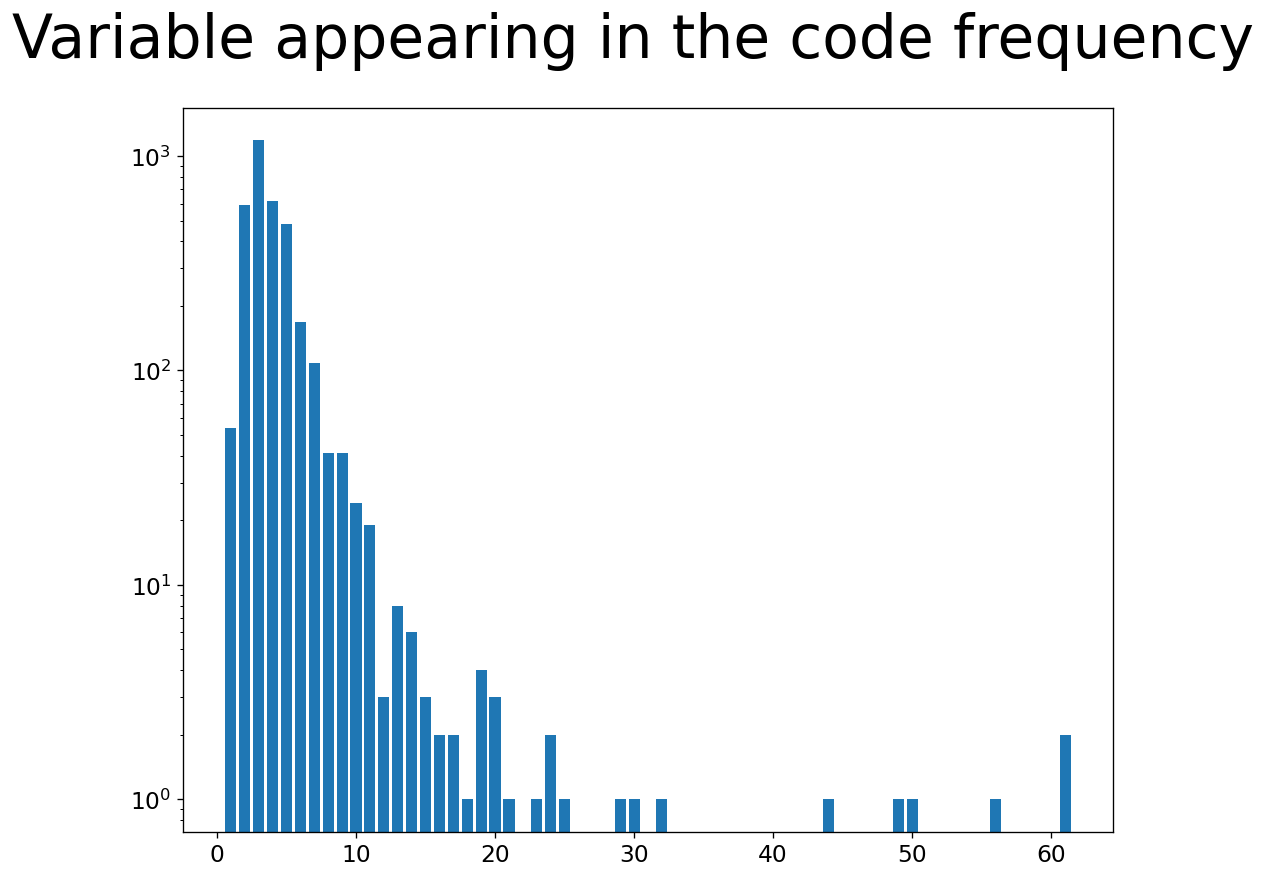

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (10,8), dpi = 120)

title_fontdict = {
    'fontsize': 18,
    'color': title_color,
    'horizontalalignment': 'center'
}

fig.suptitle("Variable appearing in the code frequency", size = 36, color = title_color)

ax.tick_params(labelcolor = label_color, labelsize = 14);
ax.bar(hm_var_appeared.keys(), hm_var_appeared.values, linewidth = 0.9, log = True)

plt.savefig("var_freq.png")